In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/El-Nico/predicting_the_burned_area_of_forest_fires_using_a_machine_learning_model/main/forestfires.csv")
data.head()

#bunch of empty areas why is that

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
numeric_cols=data.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

C:\Users\Nicholas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Nicholas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Nicholas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Nicholas\anaconda3\

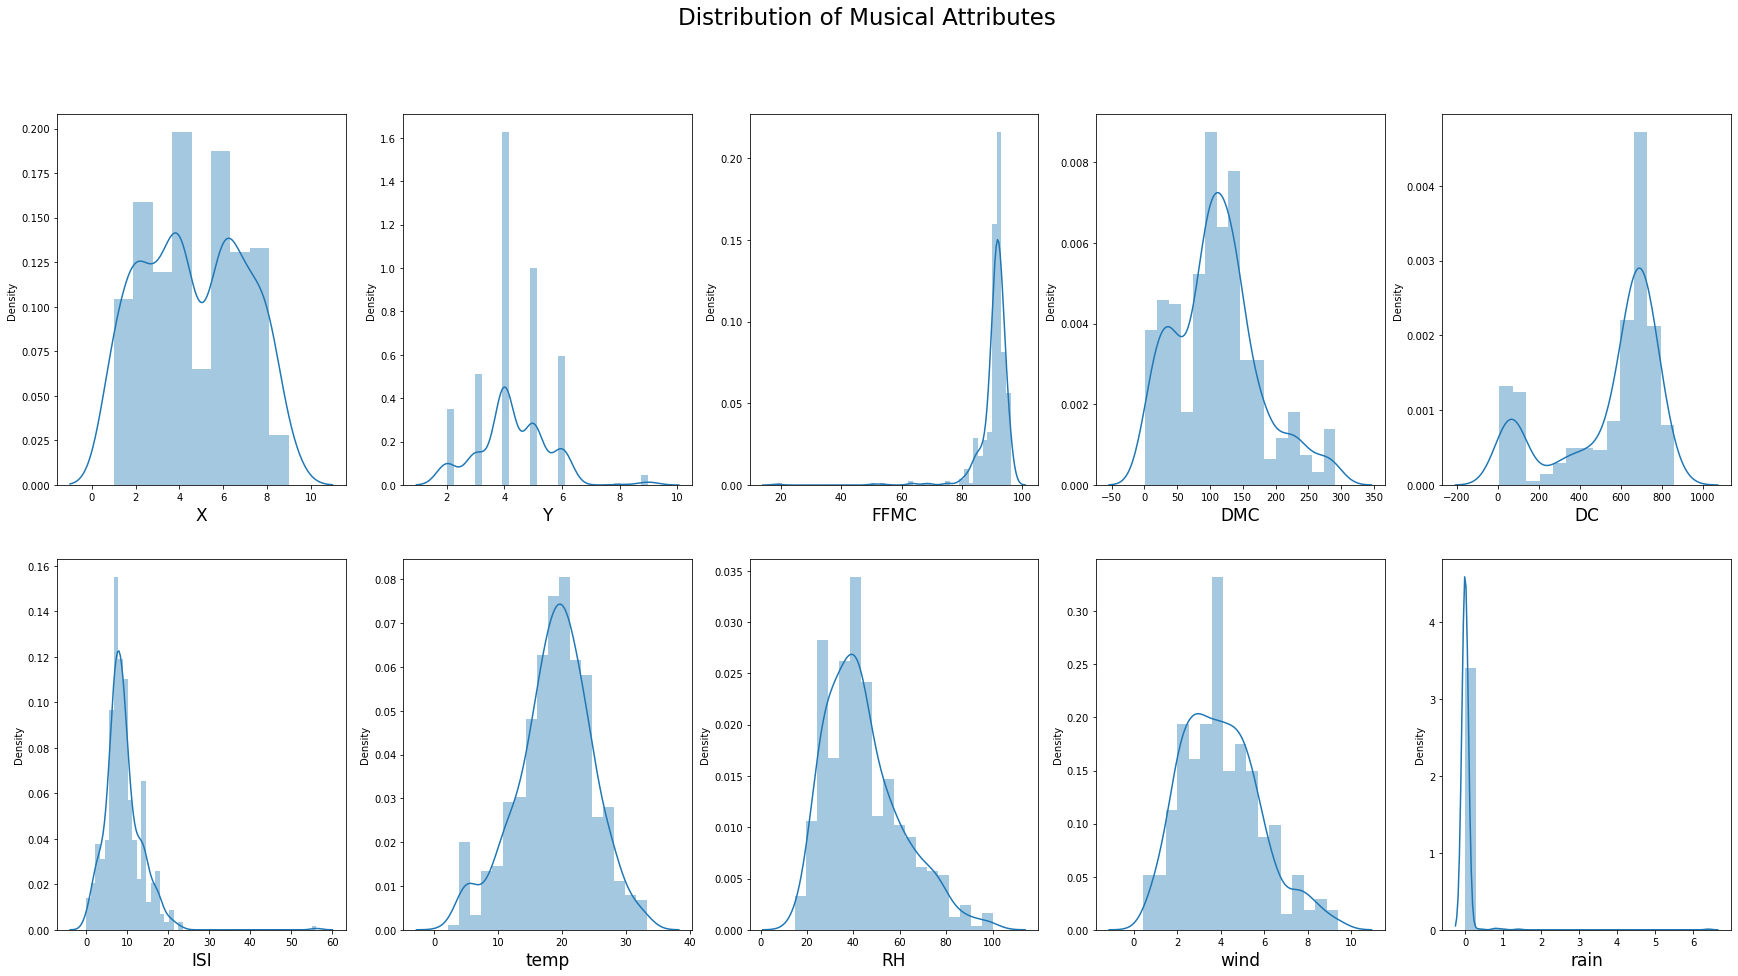

In [7]:
# show frequency distribuiton for all numerical attributes
plt.figure(figsize=(30,15))
pltnum = 1

for col in numeric_cols:
   if pltnum<=10:
        ax = plt.subplot(2,5, pltnum)
        sns.distplot(a =data[col])
        plt.xlabel(col,fontsize = 17)
   pltnum +=1
plt.suptitle("Distribution of Musical Attributes",fontsize = 23)
plt.show()

In [8]:
nn_cols=data.select_dtypes(include="object_")
nn_cols

,month,day
0,mar,fri
1,oct,tue
2,oct,sat
3,mar,fri
4,mar,sun
...,...,...
512,aug,sun
513,aug,sun
514,aug,sun
515,aug,sat


In [9]:
nn_cols["month"].iplot()

In [10]:
#isolate the response variable
area=pd.DataFrame(data["area"])
area

,area
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
512,6.44
513,54.29
514,11.16
515,0.00


In [11]:
data.drop("area", axis=1, inplace=True)
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


array([[<AxesSubplot:title={'center':'area'}>]], dtype=object)

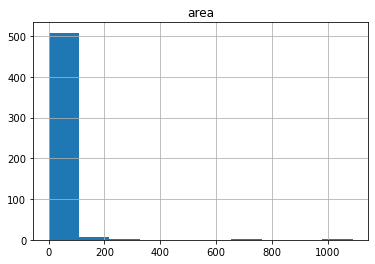

In [12]:
data.describe().T
area.hist()

In [13]:
#transforming the output area with a ln(x+1) function
from numpy import log as ln
area=area.apply(lambda x: ln(x+1))
area

,area
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
512,2.006871
513,4.012592
514,2.498152
515,0.000000


array([[<AxesSubplot:title={'center':'area'}>]], dtype=object)

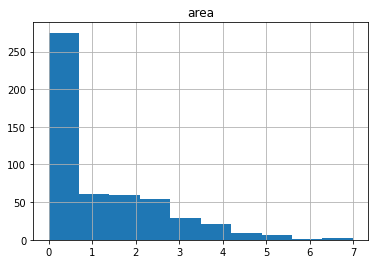

In [14]:
area.hist()

In [17]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [31]:
#one hot encoding the month and day variable
data= pd.get_dummies(data, columns=['month','day'])

KeyError: "None of [Index(['month', 'day'], dtype='object')] are in the [columns]"

In [32]:
data.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

In [33]:
data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
#stfwi
stfwi=pd.concat([
    data.loc[:,"X":"ISI"],
    data.loc[:,['month' in i for i in data.columns]],
    data.loc[:,['day' in i for i in data.columns]]
], 
    axis=1)
stfwi

,X,Y,FFMC,DMC,DC,ISI,month_apr,month_aug,month_dec,month_feb,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [56]:
#stm
stm=pd.concat([
    data.loc[:,["X","Y","temp","RH","wind","rain"]],
    data.loc[:,['month' in i for i in data.columns]],
    data.loc[:,['day' in i for i in data.columns]]
], 
    axis=1)
stm

,X,Y,temp,RH,wind,rain,month_apr,month_aug,month_dec,month_feb,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,8.2,51,6.7,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,18.0,33,0.9,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,14.6,33,1.3,0.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,8.3,97,4.0,0.2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,6,11.4,99,1.8,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,27.8,32,2.7,0.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,21.9,71,5.8,0.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,21.2,70,6.7,0.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,25.6,42,4.0,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [59]:
#fwi
fwi=pd.concat([data.loc[:,"FFMC":"ISI"]], axis=1)
fwi

,FFMC,DMC,DC,ISI
0,86.2,26.2,94.3,5.1
1,90.6,35.4,669.1,6.7
2,90.6,43.7,686.9,6.7
3,91.7,33.3,77.5,9.0
4,89.3,51.3,102.2,9.6
...,...,...,...,...
512,81.6,56.7,665.6,1.9
513,81.6,56.7,665.6,1.9
514,81.6,56.7,665.6,1.9
515,94.4,146.0,614.7,11.3


In [58]:
#m
m=pd.concat([data.loc[:,"temp":"rain"],], axis=1)
m

,temp,RH,wind,rain
0,8.2,51,6.7,0.0
1,18.0,33,0.9,0.0
2,14.6,33,1.3,0.0
3,8.3,97,4.0,0.2
4,11.4,99,1.8,0.0
...,...,...,...,...
512,27.8,32,2.7,0.0
513,21.9,71,5.8,0.0
514,21.2,70,6.7,0.0
515,25.6,42,4.0,0.0


# Algorithm 1 Multiple Regression

In [60]:
# Importing the dataset
# dataset = pd.read_csv('50_Startups.csv')
X = m.iloc[:, :-1].values
y = area.iloc[:, -1].values
print(X)

[[ 8.2 51.   6.7]
 [18.  33.   0.9]
 [14.6 33.   1.3]
 ...
 [21.2 70.   6.7]
 [25.6 42.   4. ]
 [11.8 31.   4.5]]


In [64]:
# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
ct = ColumnTransformer(transformers=[], remainder='passthrough')
X = np.array(ct.fit_transform(X))
# X = np.array()
print(X)

[[ 8.2 51.   6.7]
 [18.  33.   0.9]
 [14.6 33.   1.3]
 ...
 [21.2 70.   6.7]
 [25.6 42.   4. ]
 [11.8 31.   4.5]]


In [65]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [66]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [67]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1.16 3.34]
 [0.93 0.  ]
 [1.07 1.16]
 [1.14 4.49]
 [1.04 1.31]
 [1.1  0.  ]
 [1.3  1.08]
 [0.89 0.  ]
 [0.95 2.85]
 [0.99 0.  ]
 [0.92 1.24]
 [1.39 3.14]
 [1.01 2.41]
 [1.15 0.  ]
 [0.97 2.96]
 [0.94 0.  ]
 [1.06 0.94]
 [1.1  3.79]
 [1.1  0.74]
 [1.03 2.12]
 [1.09 0.  ]
 [1.11 1.47]
 [1.28 1.73]
 [1.04 1.92]
 [1.05 4.27]
 [1.1  3.23]
 [1.11 0.  ]
 [1.   0.  ]
 [1.14 0.  ]
 [1.03 0.  ]
 [0.96 0.  ]
 [1.04 1.44]
 [1.02 0.  ]
 [1.1  2.26]
 [0.99 1.93]
 [1.14 5.29]
 [1.05 0.  ]
 [0.96 0.94]
 [1.1  7.  ]
 [1.13 0.  ]
 [1.01 4.01]
 [1.07 0.  ]
 [1.09 0.34]
 [1.02 0.  ]
 [1.03 0.  ]
 [1.17 0.99]
 [1.06 1.99]
 [1.04 0.  ]
 [1.04 0.97]
 [1.04 1.11]
 [1.05 1.83]
 [1.01 2.5 ]
 [1.12 0.  ]
 [1.22 3.57]
 [1.04 1.96]
 [0.99 0.  ]
 [0.95 0.  ]
 [1.07 0.  ]
 [1.13 2.12]
 [0.98 3.5 ]
 [1.09 0.  ]
 [1.14 0.57]
 [1.08 2.21]
 [1.1  3.9 ]
 [1.05 3.66]
 [0.97 5.31]
 [1.06 0.  ]
 [1.07 1.4 ]
 [1.04 0.  ]
 [1.1  3.86]
 [1.14 2.4 ]
 [0.98 0.  ]
 [1.16 0.  ]
 [1.06 1.79]
 [1.   1.27]
 [1.15 0.  ]
 [1.   0.  ]

In [68]:
plot(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

NameError: name 'plot' is not defined